## Prepare rules for the all the data sets 
1) Try different values of support and confidence. Observe the change in number of rules for different support,confidence values
2) Change the minimum length in apriori algorithm
3) Visulize the obtained rules using different plots 


In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import itertools
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori, association_rules
import warnings

# Suppress warnings for cleaner output
warnings.filterwarnings('ignore')
warnings.simplefilter(action='ignore', category=FutureWarning)

# Set display options for pandas
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

# Load the dataset
movies_df = pd.read_csv('my_movies.csv')

# Display the first few rows of the dataset
movies_df.head()

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0


In [2]:
# Select only the columns related to movie purchases
purchase_data = movies_df.iloc[:, 5:]

# Display the prepared data
purchase_data.head()

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,1,0,1,1,0,1,0,0,0,1
1,0,1,0,0,1,0,0,0,1,0
2,0,0,1,0,0,1,0,0,0,0
3,1,1,0,0,1,0,0,0,0,0
4,1,1,0,0,1,0,0,0,0,0


In [3]:
# Calculate the frequency of each movie being purchased
movie_counts = purchase_data.sum()

# Display the count of each movie
print("Movie Purchase Counts:\n", movie_counts)

# Display the shape of the data
print("\nData Shape:", purchase_data.shape)

# Display information about the data
purchase_data.info()

Movie Purchase Counts:
 Sixth Sense      6
Gladiator        7
LOTR1            2
Harry Potter1    2
Patriot          6
LOTR2            2
Harry Potter2    1
LOTR             1
Braveheart       1
Green Mile       2
dtype: int64

Data Shape: (10, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Sixth Sense    10 non-null     int64
 1   Gladiator      10 non-null     int64
 2   LOTR1          10 non-null     int64
 3   Harry Potter1  10 non-null     int64
 4   Patriot        10 non-null     int64
 5   LOTR2          10 non-null     int64
 6   Harry Potter2  10 non-null     int64
 7   LOTR           10 non-null     int64
 8   Braveheart     10 non-null     int64
 9   Green Mile     10 non-null     int64
dtypes: int64(10)
memory usage: 928.0 bytes


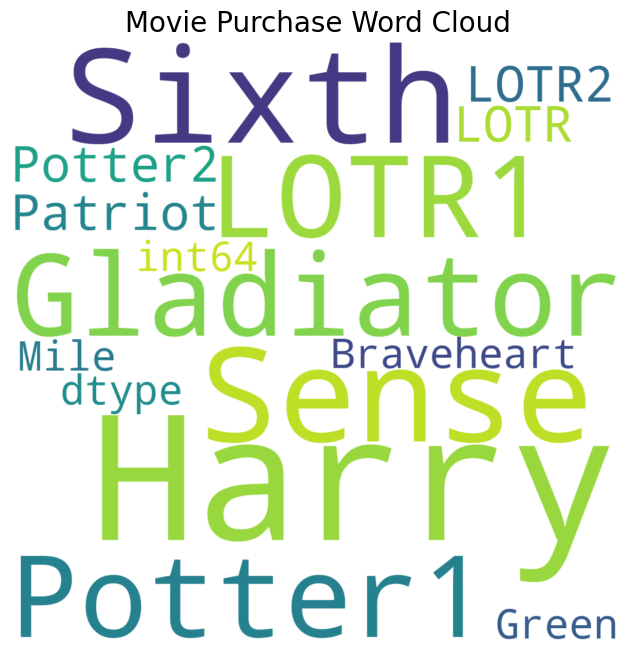

In [15]:
# Import additional library for visualization
from wordcloud import WordCloud

# Generate a word cloud for movie purchases
plt.figure(figsize=(8, 8))
wordcloud = WordCloud(background_color='white', width=1200, height=1200, max_words=121).generate(str(purchase_data.sum()))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Movie Purchase Word Cloud', fontsize=20)
plt.show()

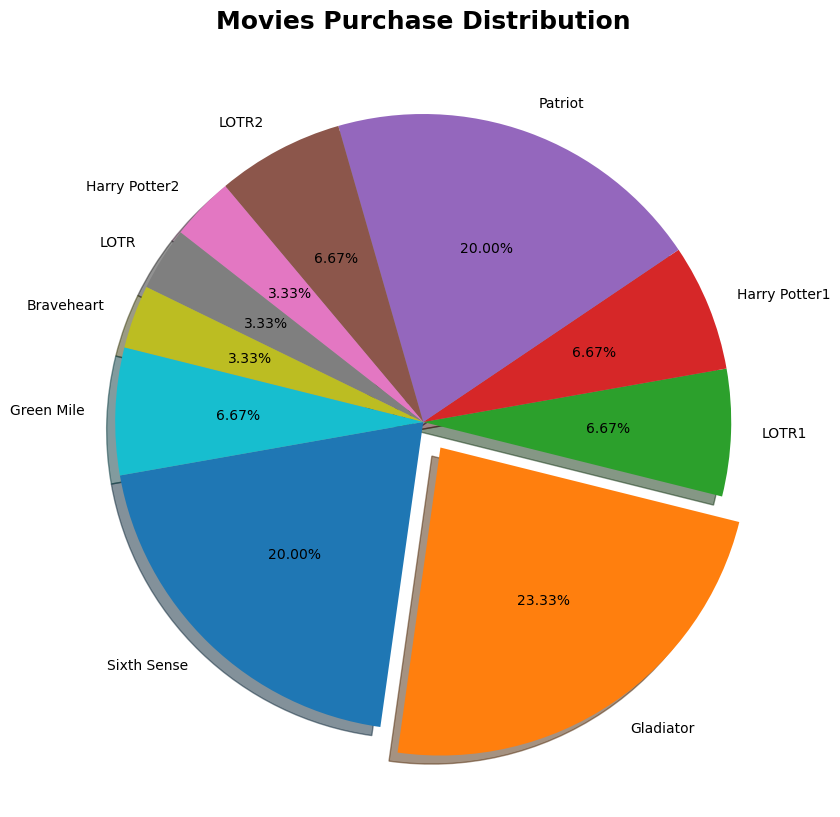

In [5]:
# Create a pie chart to visualize the distribution of movie purchases
plt.figure(figsize=(12, 10))
plt.pie(purchase_data.sum(), labels=purchase_data.columns, explode=[0.0, 0.1] + [0.0]*8, autopct='%.2f%%', shadow=True, startangle=190)
plt.title("Movies Purchase Distribution", fontsize=18, fontweight='bold')
plt.show()

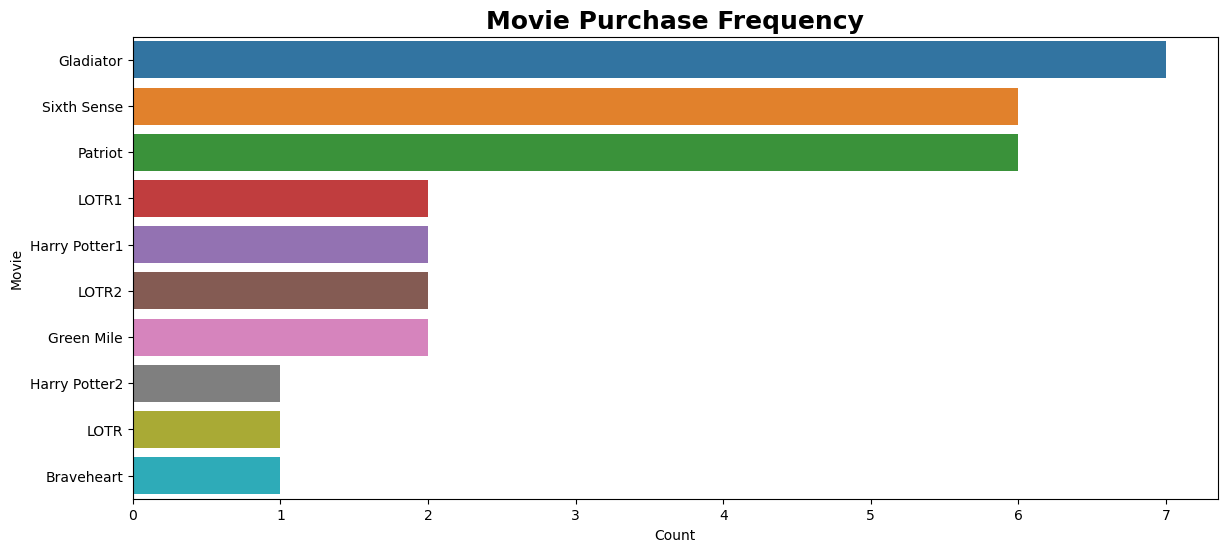

In [6]:
# Sort movie counts in descending order
sorted_counts = movie_counts.sort_values(ascending=False).reset_index()
sorted_counts.columns = ['Movie', 'Count']

# Create a bar plot for movie purchase frequency
plt.figure(figsize=(14, 6))
sns.barplot(x='Count', y='Movie', data=sorted_counts)
plt.title('Movie Purchase Frequency', fontsize=18, fontweight='bold')
plt.show()

In [7]:
# Calculate support for each movie
support_values = purchase_data.sum() / purchase_data.shape[0]
support_df = pd.DataFrame(support_values, columns=["Support"]).sort_values("Support", ascending=False)

# Display support values
support_df

,Support
Gladiator,0.7
Sixth Sense,0.6
Patriot,0.6
LOTR1,0.2
Harry Potter1,0.2
LOTR2,0.2
Green Mile,0.2
Harry Potter2,0.1
LOTR,0.1
Braveheart,0.1


In [8]:
# Generate frequent itemsets with a minimum support of 0.1
frequent_itemsets = apriori(purchase_data, min_support=0.1, use_colnames=True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))

# Display frequent itemsets
frequent_itemsets

,support,itemsets,length
0,0.6,(Sixth Sense),1
1,0.7,(Gladiator),1
2,0.2,(LOTR1),1
3,0.2,(Harry Potter1),1
4,0.6,(Patriot),1
5,0.2,(LOTR2),1
6,0.1,(Harry Potter2),1
7,0.1,(LOTR),1
8,0.1,(Braveheart),1
9,0.2,(Green Mile),1


In [9]:
# Generate association rules with a minimum confidence of 0.3
rules = association_rules(frequent_itemsets, metric='confidence', min_threshold=0.3)

# Display the rules
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4,0.533333
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8,0.400000
2,(LOTR1),(Sixth Sense),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.8,-0.200000
3,(Harry Potter1),(Sixth Sense),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.8,-0.200000
4,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2,0.250000
...,...,...,...,...,...,...,...,...,...,...
212,"(LOTR2, Green Mile)","(LOTR1, Sixth Sense, Harry Potter1)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf,1.000000
213,(Harry Potter1),"(LOTR1, Sixth Sense, LOTR2, Green Mile)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.8,1.000000
214,(LOTR1),"(Sixth Sense, Harry Potter1, LOTR2, Green Mile)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.8,1.000000
215,(LOTR2),"(LOTR1, Sixth Sense, Harry Potter1, Green Mile)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.8,1.000000


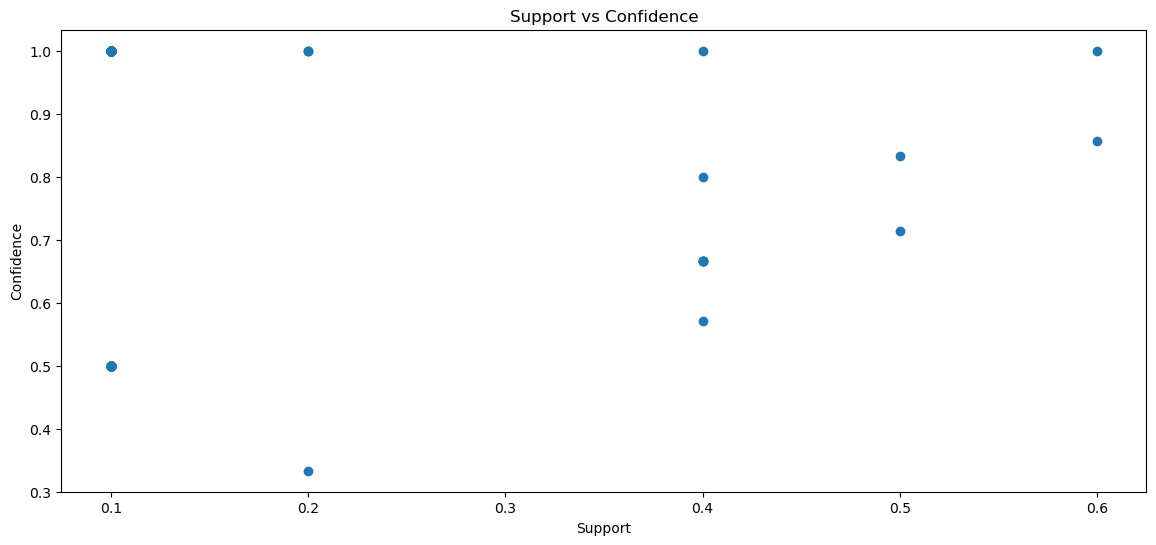

In [10]:
# Scatter plot of support vs confidence
plt.figure(figsize=(14, 6))
plt.scatter(rules['support'], rules['confidence'])
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.title('Support vs Confidence')
plt.show()

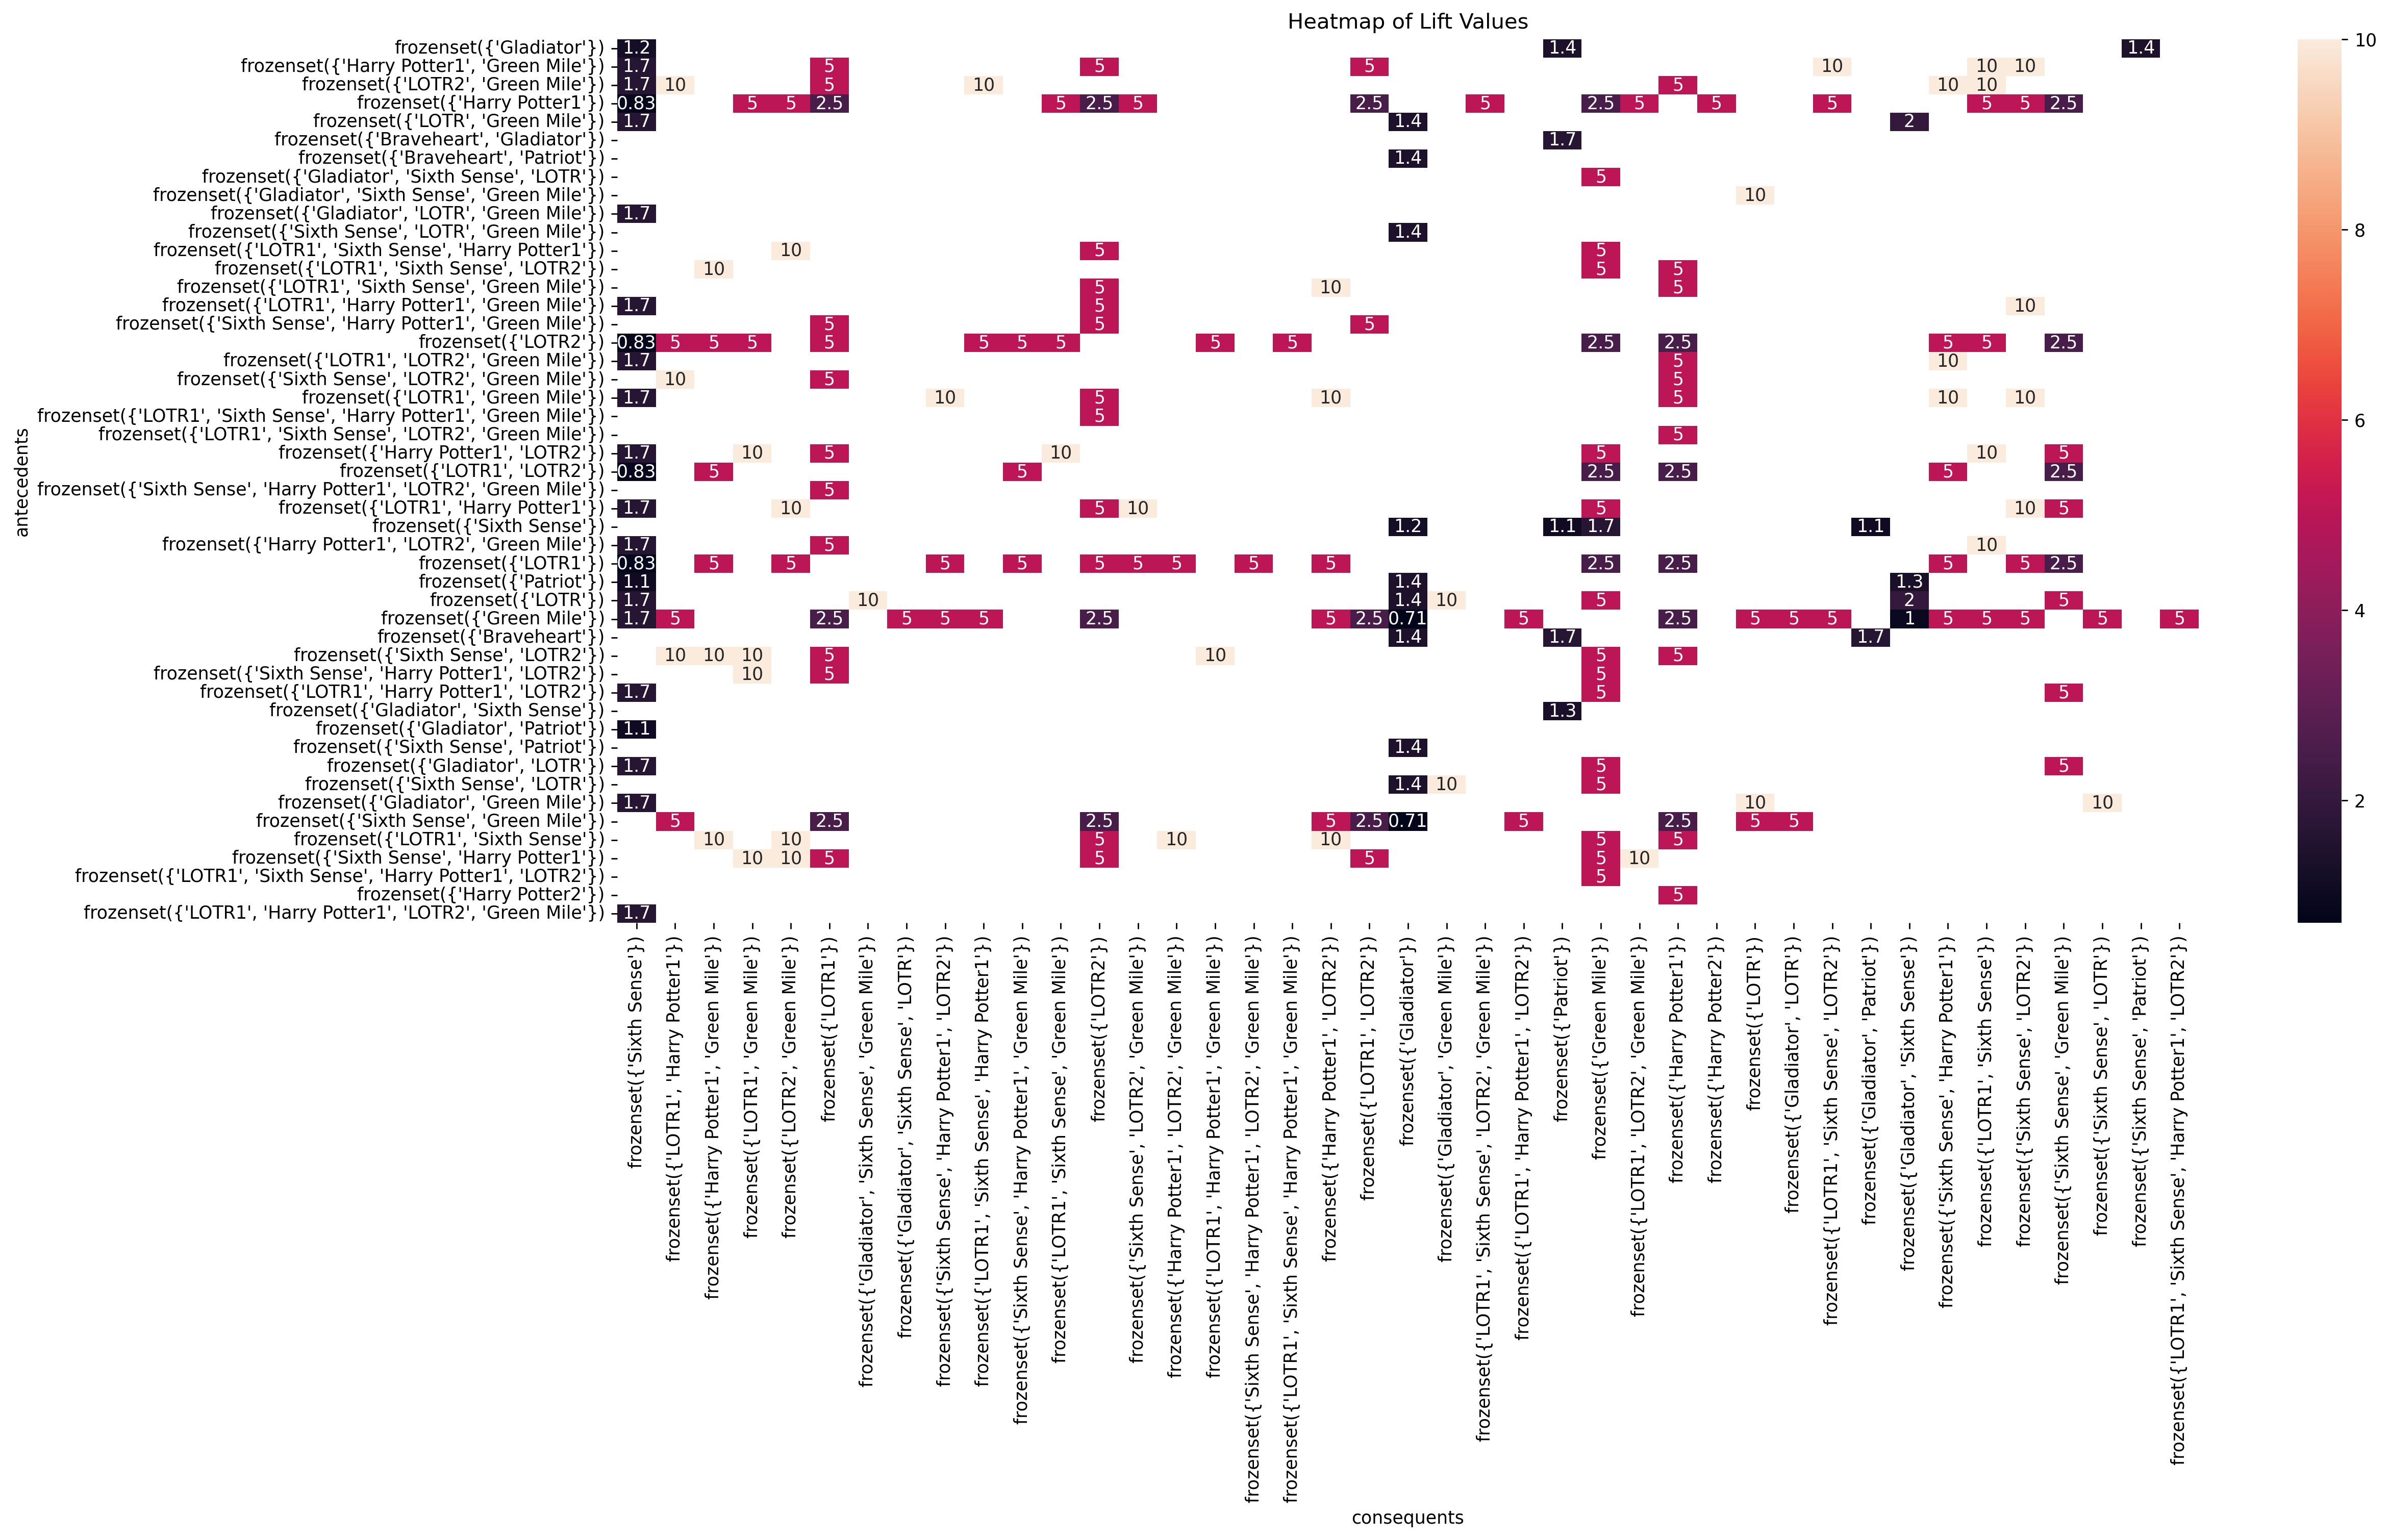

In [11]:
# Create a pivot table for lift values
lift_matrix = rules.pivot('antecedents', 'consequents', 'lift')

# Plot a heatmap for the lift matrix
plt.figure(figsize=(20, 9), dpi=250)
sns.heatmap(lift_matrix, annot=True)
plt.title('Heatmap of Lift Values')
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.show()

In [12]:
lift_matrix

consequents,(Sixth Sense),"(LOTR1, Harry Potter1)","(Harry Potter1, Green Mile)","(LOTR1, Green Mile)","(LOTR2, Green Mile)",(LOTR1),"(Gladiator, Sixth Sense, Green Mile)","(Gladiator, Sixth Sense, LOTR)","(Sixth Sense, Harry Potter1, LOTR2)","(LOTR1, Sixth Sense, Harry Potter1)","(Sixth Sense, Harry Potter1, Green Mile)","(LOTR1, Sixth Sense, Green Mile)",(LOTR2),"(Sixth Sense, LOTR2, Green Mile)","(Harry Potter1, LOTR2, Green Mile)","(LOTR1, Harry Potter1, Green Mile)","(Sixth Sense, Harry Potter1, LOTR2, Green Mile)","(LOTR1, Sixth Sense, Harry Potter1, Green Mile)","(Harry Potter1, LOTR2)","(LOTR1, LOTR2)",(Gladiator),"(Gladiator, Green Mile)","(LOTR1, Sixth Sense, LOTR2, Green Mile)","(LOTR1, Harry Potter1, LOTR2)",(Patriot),(Green Mile),"(LOTR1, LOTR2, Green Mile)",(Harry Potter1),(Harry Potter2),(LOTR),"(Gladiator, LOTR)","(LOTR1, Sixth Sense, LOTR2)","(Gladiator, Patriot)","(Gladiator, Sixth Sense)","(Sixth Sense, Harry Potter1)","(LOTR1, Sixth Sense)","(Sixth Sense, LOTR2)","(Sixth Sense, Green Mile)","(Sixth Sense, LOTR)","(Sixth Sense, Patriot)","(LOTR1, Sixth Sense, Harry Potter1, LOTR2)"
antecedents,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
(Gladiator),1.190476,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.428571,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.428571,NaN
"(Harry Potter1, Green Mile)",1.666667,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,NaN,NaN,NaN,10.0,10.0,NaN,NaN,NaN,NaN
"(LOTR2, Green Mile)",1.666667,10.0,NaN,NaN,NaN,5.0,NaN,NaN,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,10.0,10.0,NaN,NaN,NaN,NaN,NaN
(Harry Potter1),0.833333,NaN,NaN,5.0,5.0,2.5,NaN,NaN,NaN,NaN,NaN,5.0,2.5,5.0,NaN,NaN,NaN,NaN,NaN,2.5,NaN,NaN,5.0,NaN,NaN,2.500000,5.0,NaN,5.0,NaN,NaN,5.0,NaN,NaN,NaN,5.0,5.0,2.5,NaN,NaN,NaN
"(LOTR, Green Mile)",1.666667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.428571,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"(Braveheart, Gladiator)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.666667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"(Braveheart, Patriot)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.428571,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"(Gladiator, Sixth Sense, LOTR)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"(Gladiator, Sixth Sense, Green Mile)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
